In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [4]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile
from   tmr_kcorr     import tmr_kcorr

In [5]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [6]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
549207,588848899354199033,130.70116414,-0.54738174,19.775936,0.24403,4,G09_Y3_027_283,5,22.738577,21.094969,19.77204,19.227434,18.854094,0.24403,866.0562678075402,39.687730545562914,G9,0,0,-453.9613011713217,527.7570126127752,-6.650837285875798,450.2627379788677,-530.9095843451346,-7.144298284219827,1.3229294,19.775936,0.9103443215916117,0,6,0.08454315801530732,0.4971282187479143,0.3114175130255997,0.8753033216091071,0.7590435737407114,0.8,-0.2367091,-0.195224,-19.986502828891286,-20.02798792987586,-20.22321193187953,39.762438955600274,39.99914805858852,39.80392405658485,-0.02277792217766615,0.2685832683330129,0.19394695618453495,0.5337585580466762,-19.869032272050223
227399,587726014009770270,213.35618412,1.18307984,18.552156,0.13983,4,G15_Y1_BN1_177,6,20.862318,19.303232,18.279655,17.857204,17.435226,0.13983,464.8302817683589,38.336472063956535,G15,0,0,-340.55549400327595,-224.18149769255263,8.42005429036397,342.1194200948413,221.80140702024028,8.045119983896583,1.0235767,18.552156,0.9184156031101496,0,6,-0.05196698293774358,0.053194150402302104,0.17476086165853008,0.43430404756896257,0.7640335505397629,0.8,-0.1356351,-0.11186399,-19.823441384396308,-19.847212484142535,-19.959076477250807,38.37559783276056,38.51123292561506,38.39936893250679,-0.0767740349130677,-0.012336310766572156,0.13995084344913342,0.2528389789470911,-19.78863136618691
491670,587729778517213614,212.57571968,-1.39949838,19.216143,0.24972,4,G15_Y3_013_027,6,22.70906,20.863583,19.208324,18.600239,18.132467,0.24972,889.2027223521246,39.74500391824934,G15,0,0,-599.4065970846342,-382.9787075978315,-17.37779434053268,602.0430699336773,378.78982784083576,-18.03760258936332,1.6552582,19.216143,1.1978070223447426,0,7,0.1289923757969123,0.5864435321631076,0.3700726721096227,0.9947857854530082,1.0305450653675519,0.8,-0.24222842,-0.19977601,-20.656705517351376,-20.69915792721485,-20.898933935940015,39.87284817177032,40.11507659035896,39.915300581633794,-0.019709936485799828,0.2848008537591778,0.19701494187640128,0.5499761434728411,-20.483647787118155
545800,588848898856911713,221.12088754,-0.99373855,19.728718,0.26712,4,G15_Y6_086_134,5,22.21855,20.880228,19.655195,19.243881,19.061428,0.26712,960.7436738290123,39.91303766732025,G15,0,0,-571.0920153685867,-498.56206747414836,-13.14975065306054,574.5397715819688,494.56781100961484,-13.779414638730673,1.2250328,19.728718,0.8026788987925455,0,5,0.07693064857600693,0.49928455617994577,0.3057593531692697,0.838311492916497,0.6924806666492571,0.8,-0.2591064,-0.213696,-20.23097281890566,-20.27638321357424,-20.490079216534443,39.95969062286074,40.218797020489525,40.00510101752932,-0.009854228907955703,0.3344210582946538,0.2068706494542454,0.5995963480083171,-20.132084115190636
123437,587724649255338270,176.15958368,-2.66640431,19.517628,0.20537,3,G12_Y5_015_090,5,21.890335,20.67331,19.400621,18.907265,18.616331,0.20537,712.1035128198369,39.26271564078909,G12,0,0,-588.8111097774903,39.52598881406349,-27.

In [7]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.025
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample / dbin, lw=1, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    plt.ylim(0., 10.)
    
    plt.legend(frameon=False)

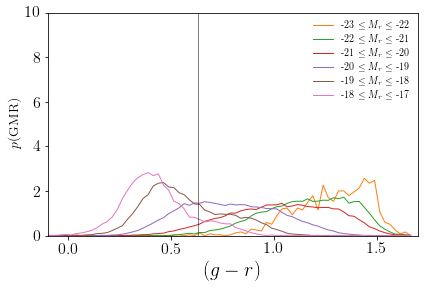

In [8]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

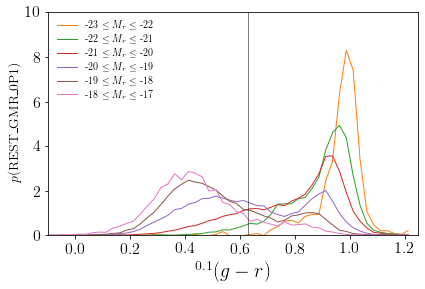

In [9]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

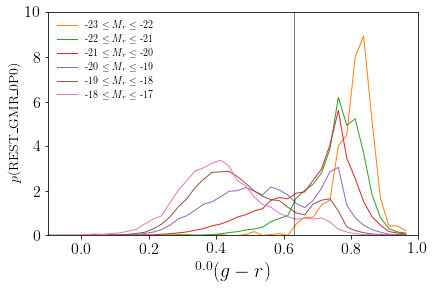

In [10]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

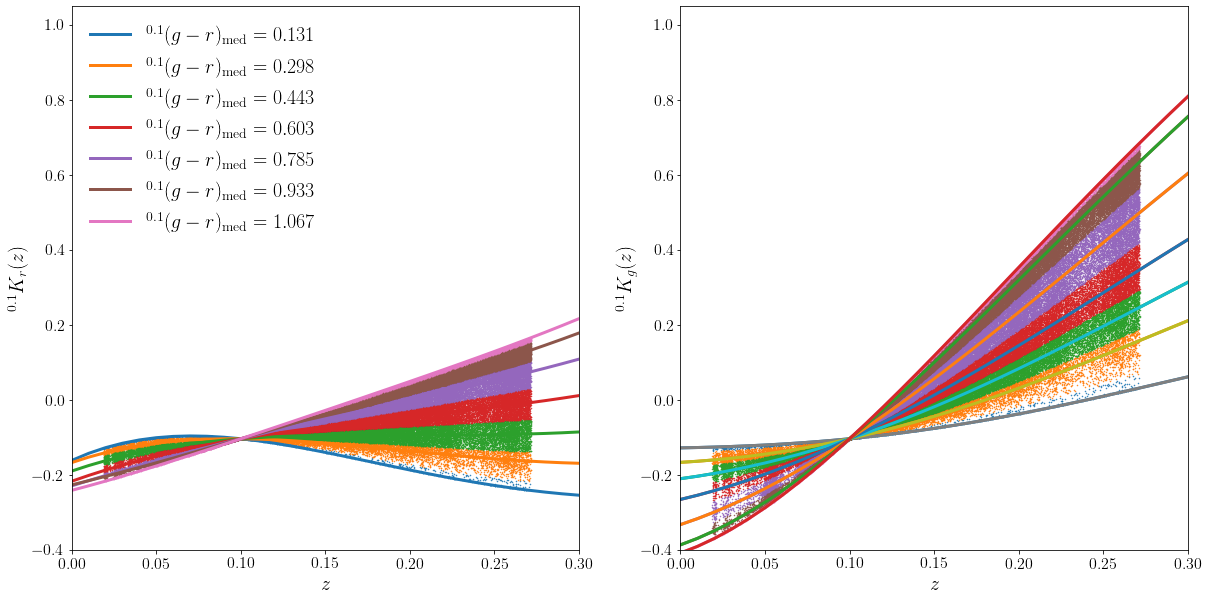

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

In [12]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

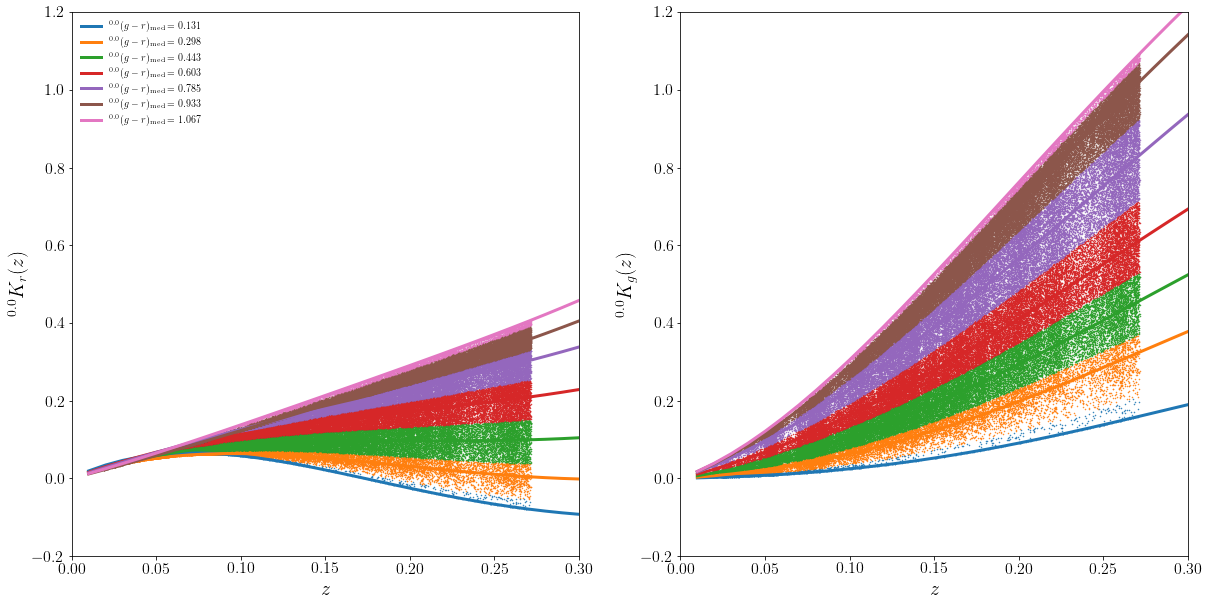

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = (kE['REST_GMR_0P1_INDEX'] == idx)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.2, 1.2)
    axes[1].set_ylim(-0.2, 1.2)

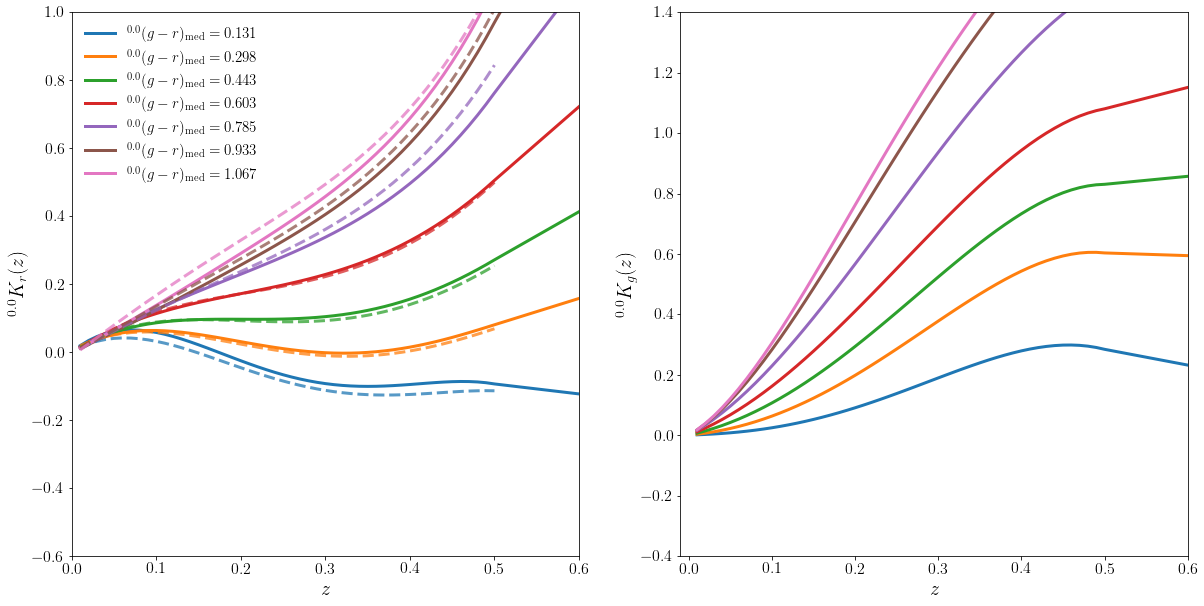

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

kcorr_tmr = tmr_kcorr()

z       = np.arange(0.01,0.501,0.01)
cols    = [0.158, 0.298, 0.419, 0.553, 0.708, 0.796, 0.960]

for i, c in enumerate(cols):
    k  = kcorr_tmr.ref_eval(c, z)
    axes[0].plot(z, k, '--', c=colors[i], alpha=0.75)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=15)

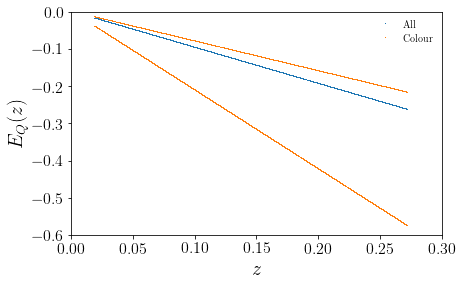

In [15]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

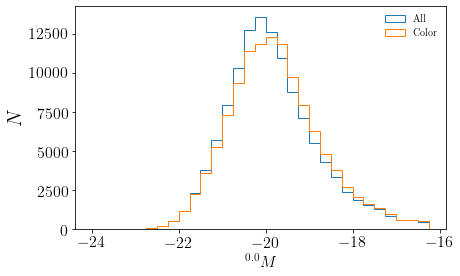

In [13]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

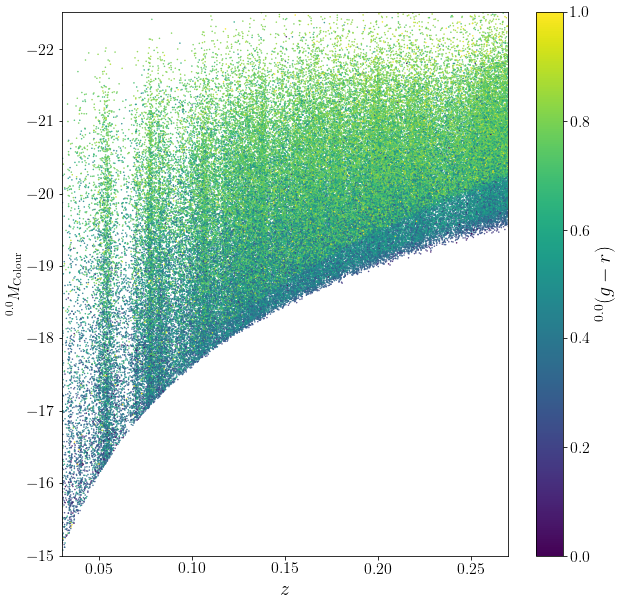

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

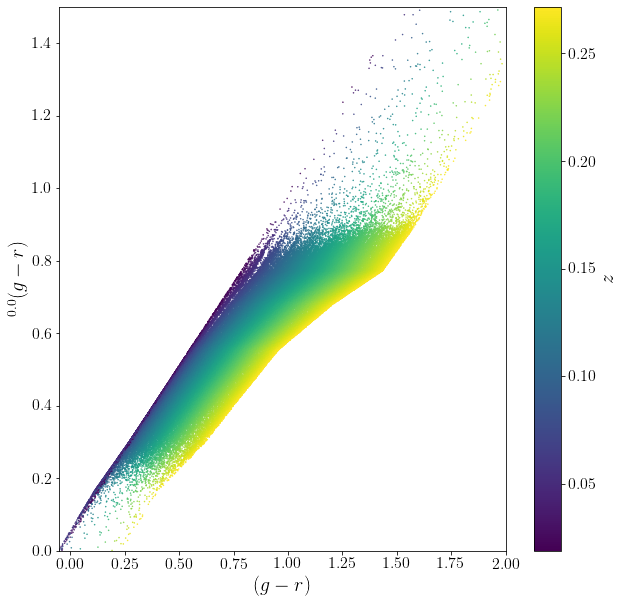

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.